In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import sklearn
import requests


In [2]:
my_data = pd.read_csv('C:\\Users\\Vaibhav\\Documents\\ML Projects\\Dataset\\student_info.csv')

In [3]:
my_data.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [4]:
my_data.shape

(200, 2)

In [5]:
my_data.columns

Index(['study_hours', 'student_marks'], dtype='object')

In [6]:
my_data.dtypes

study_hours      float64
student_marks    float64
dtype: object

In [7]:
my_data.isna().sum()

study_hours      5
student_marks    0
dtype: int64

In [8]:
my_data.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


In [9]:
my_data.dropna(inplace=True)

In [10]:
my_data.isna().sum()

study_hours      0
student_marks    0
dtype: int64

In [11]:
my_data.shape

(195, 2)

In [12]:
my_data.dtypes

study_hours      float64
student_marks    float64
dtype: object

In [13]:
my_data.head(10)

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
3,5.67,71.82
4,8.67,84.19
5,7.55,81.18
6,6.67,76.99
7,8.99,85.46
8,5.19,70.66
9,6.75,77.82
10,6.59,75.37


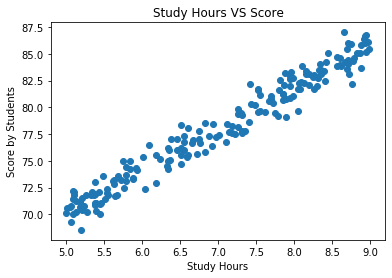

In [14]:
plt.scatter(my_data['study_hours'], my_data['student_marks'] )
plt.xlabel('Study Hours')
plt.ylabel('Score by Students')
plt.title('Study Hours VS Score')
plt.show()

In [15]:
x = my_data.drop('student_marks', axis=1)
y = my_data.drop('study_hours', axis=1)

In [16]:
print(x.head())
print("X-Shape ", x.shape)

   study_hours
0         6.83
1         6.56
3         5.67
4         8.67
5         7.55
X-Shape  (195, 1)


In [17]:
print(y.head())
print("Y-Shape", y.shape)

   student_marks
0          78.50
1          76.74
3          71.82
4          84.19
5          81.18
Y-Shape (195, 1)


In [18]:
# splitting our data into training and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=51)

In [19]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(156, 1)
(39, 1)
(156, 1)
(39, 1)


## Model Training 

In [20]:
from sklearn.linear_model import LinearRegression
linregressor = LinearRegression()
linregressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
linregressor.coef_

array([[3.91306058]])

In [22]:
linregressor.intercept_

array([50.59564059])

In [23]:
linregressor.predict([[4]])[0][0].round(2)

66.25

In [24]:
y_predt = linregressor.predict(x_test)
y_predt

array([[81.07838248],
       [85.69579396],
       [74.23052647],
       [70.90442498],
       [73.25226133],
       [85.14796548],
       [82.17403944],
       [82.91752095],
       [82.25230065],
       [73.25226133],
       [84.09143912],
       [72.07834315],
       [81.66534156],
       [79.16098279],
       [71.45225346],
       [80.13924794],
       [77.51749735],
       [76.22618736],
       [71.92182073],
       [71.6870371 ],
       [70.20007408],
       [82.87839034],
       [70.3565965 ],
       [79.00446037],
       [75.44357525],
       [84.95231245],
       [82.91752095],
       [78.73054613],
       [72.58704103],
       [71.7261677 ],
       [83.11317398],
       [71.17833922],
       [81.35229672],
       [82.64360671],
       [72.86095527],
       [77.00879948],
       [73.7609592 ],
       [70.70877195],
       [78.88706855]])

In [25]:
pd.DataFrame(np.c_[x_test, y_test, y_predt], columns=['Hours', 'Marks', 'Prediction'])

,Hours,Marks,Prediction
0,7.79,79.17,81.078382
1,8.97,86.12,85.695794
2,6.04,72.33,74.230526
3,5.19,70.66,70.904425
4,5.79,73.64,73.252261
5,8.83,85.04,85.147965
6,8.07,82.30,82.174039
7,8.26,81.70,82.917521
8,8.09,82.38,82.252301
9,5.79,74.44,73.252261


In [26]:
linregressor.score(x_test, y_test).round(4)

0.9736

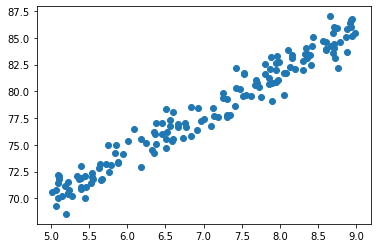

In [27]:
plt.scatter(x_train, y_train)
plt.show()

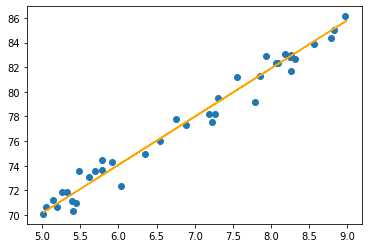

In [28]:
plt.scatter(x_test, y_test)
plt.plot(x_train, linregressor.predict(x_train), color='orange')

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('Mean Absolute Error = ', mean_absolute_error(y_test, y_predt))
print('Mean Squared Error = ', mean_squared_error(y_test, y_predt))
print('Root Mean Squared Error = ', np.sqrt(mean_squared_error(y_test, y_predt)))
print('R2 Score = ', r2_score(y_test, y_predt))


Mean Absolute Error =  0.6378320940832182
Mean Squared Error =  0.6552618597020997
Root Mean Squared Error =  0.8094824641103102
R2 Score =  0.9736130341790977


In [30]:
hours_studied = float(input('Enter Study Hours : '))
linregressor.predict([[hours_studied]])[0].round(4)

Enter Study Hours : 2


array([58.4218])